## Final Project Submission

Please fill out:
* Student name: James Benedito
* Student pace: Part Time
* Instructor name: Morgan Jones

## Introduction

Driving through a suburban neighborhood, it's inevitable that one will encounter at least one "for sale" sign. These signs typically have the logo of some big-time real estate company, like Century 21 or REMAX. Real estate companies are businesses that deal with buying and selling properties. When purchasing a house, everyone has their non-negotiables. Some people want a big kitchen or backyard. Others may want a basement or 'x' amount of bathrooms. In this Jupyter notebook, I will explore the different variables that impact a home's value. The information in this analysis will be applicable to real estate companies who sell houses to clients.

## Business Problem

King County is a county located in Washington state with a population of approximately 2.2 million people, according to the 2022 US Census. As of 2021, the median household income is about $106,000 (https://www.census.gov/quickfacts/kingcountywashington).

A theoretical real estate company (called Not Real Real Estate) in King County sells homes. They want to be informed and know the factors that increase a house's value. My data analysis will bring light to the variables that are most impactful to a home's sale price in King County and will thus inform this real estate company on the types of properties they should focus on selling.  

## Goal

My goal is to come up with concrete suggestions based on a multiple linear regression analysis. The final linear regression model will include the variables that are most impactful to a house's sale price, which will serve as the dependent variable of interest throughout the entire exploration process. In other words, the independent variables in my final model will be those that are the best predictors of a house's sale price (the dependent variable). 

## Dataset

The dataset I am using for the analysis is <b>kc_house_data.csv</b>. This dataset includes data on houses in King County, which is where Not Real Real Estate and their clients are located.

## Data Exploration

I will begin by exploring the dataset, using the <b>.head()</b> method to visualize the first five rows in a table format. Furthermore, I will use the <b>.info()</b> and <b>.describe()</b> methods to get a better understanding of the overall dataset.

In [1]:
# importing relevant packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
# reading data through pandas
house_data = pd.read_csv('data\\kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# initial exploration of the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

From the <b>.info()</b> method, we see that there are 25 columns and over 30,000 entries in the dataset. The <b>heat_source</b> and <b>sewer_system</b> columns have missing values. In terms of dtype, the dataset contains a mix of integers, float values, and objects (strings). 

In [4]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


The <b>.describe()</b> method shows statistics for 15 columns, which are of dtype integer or float. The columns containing object dtypes are not included in the table generated above. The high amount of numeric variables further supports the idea that a multiple linear regression is the best avenue to go down, as far as analysis is concerned. 

## Data Cleaning 

Before proceeding, I want to address the missing data in the <b>house_data</b> dataframe. As we saw earlier with <b>.info()</b>, the <b>heat_source</b> and <b>sewer_system</b> columns had missing entries. Let's drop any null values from the dataframe using <b>.dropna()</b>.

In [5]:
# dropping null values
house_data = house_data.dropna()
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

We can see that the null values were successfully dropped because the number of entries in the dataframe decreased.

## Numeric Variables

Next, I will perform a correlation between <b>price</b> and the <b>numeric variables</b> to see which of them have a strong linear relationship with price. I will use the <b>.corr()</b> method to do this.

In [6]:
# performing correlation between price and potential independent variables (int and float dtypes)
house_data.corr()['price']

id              -0.034096
price            1.000000
bedrooms         0.288954
bathrooms        0.480337
sqft_living      0.608616
sqft_lot         0.086550
floors           0.180589
sqft_above       0.538631
sqft_basement    0.245005
sqft_garage      0.263674
sqft_patio       0.313789
yr_built         0.095796
yr_renovated     0.085023
lat              0.063430
long            -0.022278
Name: price, dtype: float64

Based on the results from <b>.corr()</b>, it appears that <b>sqft_living</b> has the strongest correlation with <b>price</b> (r=0.61). This <b>sqft_living</b> variable will be useful for a baseline model.

## Baseline Model

As mentioned previously, <b>sqft_living</b> will be utilized for my simple linear regression baseline model. I will start by plotting the relationship between <b>sqft_living</b> and <b>price</b>. Then, I will generate the baseline model.

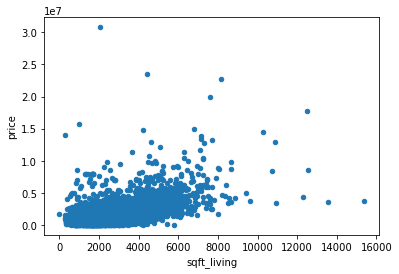

In [7]:
# scatterplot to visualize relationship between sqft_living and price
house_data.plot.scatter(x='sqft_living', y='price');

In [8]:
# generating baseline model
y_baseline = house_data["price"]
X_baseline = house_data[["sqft_living"]]

baseline_model = sm.OLS(y_baseline, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:07   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

In [9]:
# calculating overall error of model
mae = baseline_results.resid.abs().sum() / len(y_baseline)
mae

396271.4457372304

From the baseline model we see that the model is statistically significant overall (the p-value for the F-statistic is 0). According to the model, one unit increase in <b>sqft_living</b> will lead to about a $560 increase in price. The p-values for both the constant and the sqft_living coefficient are significant (both t-test p-values are 0). Based on the R-squared value, we know that the model explains only about <b>37% of the variance</b> in price. Therefore, this isn't a strong model and needs to be improved further. Let's inspect the distribution of <b>sqft_living</b> to see if it's normal. 

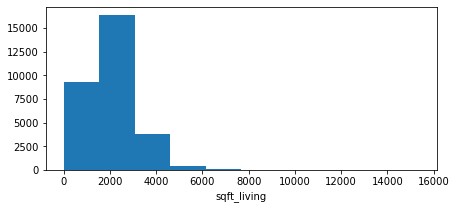

In [10]:
# inspecting distribution of sqft_living
fig, ax = plt.subplots(figsize=(7,3))
ax.hist(house_data['sqft_living'])
ax.set_xlabel("sqft_living");

From the histogram, we see that the <b>sqft_living</b> variable has a slight positive skew. Performing a <b>log transformation</b> may help normalize the data. 

# Baseline Model: Log Transformed

In [11]:
# create copy of X_baseline
X_baseline_log = X_baseline.copy()

# perform log transformation
X_baseline_log["log(sqft_living)"] = np.log(X_baseline_log["sqft_living"])

# compare raw vs. transformed values
X_baseline_log[["sqft_living", "log(sqft_living)"]]

,sqft_living,log(sqft_living)
0,1180,7.073270
1,2770,7.926603
2,2880,7.965546
3,2160,7.677864
4,1120,7.021084
...,...,...
30150,1910,7.554859
30151,2020,7.610853
30152,1620,7.390181
30153,2570,7.851661


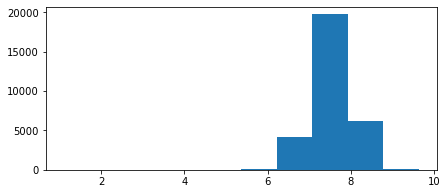

In [12]:
# visualize distribution of log transformed data
fig, ax = plt.subplots(figsize=(7,3))
ax.hist(X_baseline_log['log(sqft_living)']);

In [13]:
# generating new baseline model with log transformed feature (sqft_living)

# dropping original sqft_living column
X_baseline_log.drop("sqft_living", axis=1, inplace=True)

y_baseline_log = house_data['price']
baseline_log_model = sm.OLS(y_baseline_log, sm.add_constant(X_baseline_log))
baseline_log_results = baseline_log_model.fit()

print(baseline_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:08   Log-Likelihood:            -4.5079e+05
No. Observations:               30111   AIC:                         9.016e+05
Df Residuals:                   30109   BIC:                         9.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.781e+06   7.57e+04  

In [14]:
# calculating overall error of model
mae = baseline_log_results.resid.abs().sum() / len(y_baseline_log)
mae

429565.7975648623

By performing a log transformation on the <b>sqft_living</b> feature, we see the model worsen. The R-squared value has decreased from 0.37 to about 0.27 and has a significant F-statistic, as indicated by the p-value (<0.05). This means that the model is predicting about <b>27% of the variation</b> in <b>price</b>. All the coefficients are significant as well based on their t-test p-values. The results aren't what we wanted, so let's keep the original baseline model over the log transformed one. Now, let's turn our attention to the categorical variables of the dataset. 

## Categorical Variables

For the columns containing <b>categorical</b> information, the data needs to be transformed and one-hot encoded first before a model can be generated. Let's create a copy of the data table with only variables of object dtype present.

In [15]:
# creating copy of data with only obj columns
categorical_data = house_data.select_dtypes(include='object')
# use .head() to visualize first five rows 
categorical_data.head()

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [16]:
# use .info() to confirm only variables of obj dtype are present 
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          30111 non-null  object
 1   waterfront    30111 non-null  object
 2   greenbelt     30111 non-null  object
 3   nuisance      30111 non-null  object
 4   view          30111 non-null  object
 5   condition     30111 non-null  object
 6   grade         30111 non-null  object
 7   heat_source   30111 non-null  object
 8   sewer_system  30111 non-null  object
 9   address       30111 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


Looking at our categorical variables, it would not make sense to look at <b>date</b> and <b>address</b> and their relationship with price, since both of these data vary too much and will most likely not have any discernable pattern. Let's create a new copy of the categorical dataframe that excludes these two columns. I will also add the <b>price</b> column because it's the dependent variable of interest. Furthermore, I will include the <b>bedrooms</b>, <b>bathrooms</b>, and <b>floors</b> columns because even though they have int and float dtypes, they seemed to be more discrete, categorical variables based on the earlier analysis.

In [17]:
# create another copy of categorical dataframe, excluding unnecessary columns
cat_data_edited = house_data[['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source',
                              'sewer_system', 'bedrooms','bathrooms', 'floors', 'price']]
# use .head() to visualize first five rows
cat_data_edited.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors,price
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,4,1.0,1.0,675000.0
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,5,2.5,1.0,920000.0
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,6,2.0,1.0,311000.0
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,3,3.0,2.0,775000.0
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0,592500.0


With the columns in the <b>cat_data_edited</b> dataframe, some edits must be done to make the data more usable. Let's start by creating a new column called <b>rating</b> that extracts the number from grade. 

In [18]:
# creating a new column with just the number from grade
cat_data_edited['rating'] = cat_data_edited['grade'].str.split().apply(lambda x: x[0])
cat_data_edited

<ipython-input-18-00cf2c3f359d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_edited['rating'] = cat_data_edited['grade'].str.split().apply(lambda x: x[0])


,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors,price,rating
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,4,1.0,1.0,675000.0,7
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,5,2.5,1.0,920000.0,7
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,6,2.0,1.0,311000.0,7
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,3,3.0,2.0,775000.0,9
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0,592500.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,5,2.0,1.5,1555000.0,8
30151,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,3,2.0,2.0,1313000.0,7
30152,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,3,2.0,1.0,800000.0,7
30153,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,3,2.5,2.0,775000.0,8


In [19]:
# checking dtype of new column, 'rating'
cat_data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   waterfront    30111 non-null  object 
 1   greenbelt     30111 non-null  object 
 2   nuisance      30111 non-null  object 
 3   view          30111 non-null  object 
 4   condition     30111 non-null  object 
 5   grade         30111 non-null  object 
 6   heat_source   30111 non-null  object 
 7   sewer_system  30111 non-null  object 
 8   bedrooms      30111 non-null  int64  
 9   bathrooms     30111 non-null  float64
 10  floors        30111 non-null  float64
 11  price         30111 non-null  float64
 12  rating        30111 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.2+ MB


Let's convert rating from an object dtype to an integer so its relationship with price can be graphed.

In [20]:
# convert rating to int dtype
cat_data_edited['rating'] = cat_data_edited['rating'].astype('int64')

<ipython-input-20-aef727951dc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_edited['rating'] = cat_data_edited['rating'].astype('int64')


In [21]:
# checking if dtype of rating was converted successfully
cat_data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   waterfront    30111 non-null  object 
 1   greenbelt     30111 non-null  object 
 2   nuisance      30111 non-null  object 
 3   view          30111 non-null  object 
 4   condition     30111 non-null  object 
 5   grade         30111 non-null  object 
 6   heat_source   30111 non-null  object 
 7   sewer_system  30111 non-null  object 
 8   bedrooms      30111 non-null  int64  
 9   bathrooms     30111 non-null  float64
 10  floors        30111 non-null  float64
 11  price         30111 non-null  float64
 12  rating        30111 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 3.2+ MB


Now that <b>rating</b> is of int dtype, let's create a scatterplot to visualize its relationship with <b>price</b>. 

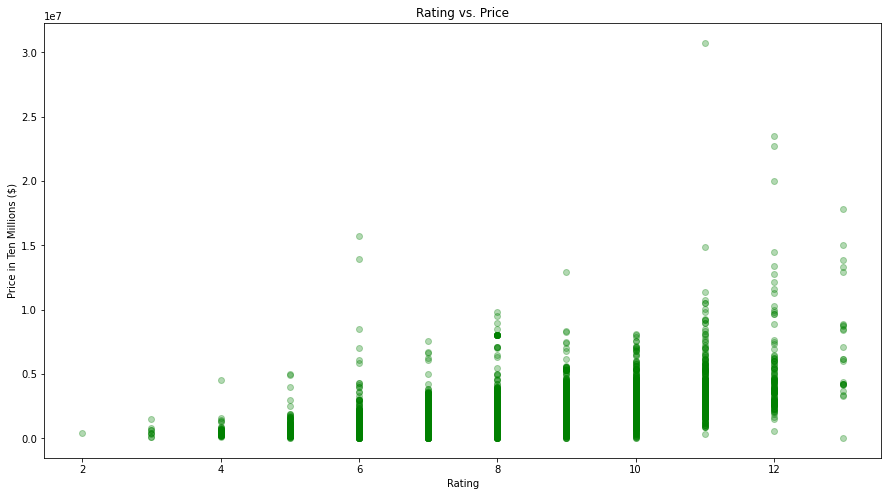

In [22]:
# creating scatterplot to visualize relationship between rating and price
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(cat_data_edited['rating'], cat_data_edited['price'], alpha=0.3, color="green")
ax.set_title("Rating vs. Price")
ax.set_xlabel("Rating")
ax.set_ylabel("Price in Ten Millions ($)");

In [23]:
# checking correlation between rating and price
cat_data_edited.corr()['price']

bedrooms     0.288954
bathrooms    0.480337
floors       0.180589
price        1.000000
rating       0.566534
Name: price, dtype: float64

Using <b>.corr()</b>, we see that the correlation coefficient between <b>rating</b> and <b>price</b> is about 0.57. Let's create a linear regression model with <b>rating</b> as the only independent variable.

In [24]:
y = cat_data_edited["price"]
X_rating = cat_data_edited[["rating"]]

rating_model = sm.OLS(y, sm.add_constant(X_rating))
rating_results = rating_model.fit()

print(rating_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                 1.423e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:08   Log-Likelihood:            -4.4961e+05
No. Observations:               30111   AIC:                         8.992e+05
Df Residuals:                   30109   BIC:                         8.992e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.288e+06   2.88e+04    -79.463      0.0

The linear regression model with <b>rating</b> as the only independent variable is significant, with an F-statistic p-value of 0. Both the constant and the rating coefficient are significant and have a t-test p-value of 0. The coefficient for rating indicates that with one unit increase in rating, about a $440,000 increase in price is expected. The model is weak, having an R-squared value of about 0.32. This model is actually worse at predicting the variance in price than the baseline model created earlier because it only accounts for about <b>32% of the variation</b>, whereas the baseline detected about <b>37% of the variation</b> in price.

Let's take a look at some of the other categorical variables to see what could be useful.

In [25]:
cat_data_edited['waterfront'].value_counts()

NO     29600
YES      511
Name: waterfront, dtype: int64

In [26]:
cat_data_edited['greenbelt'].value_counts()

NO     29339
YES      772
Name: greenbelt, dtype: int64

In [27]:
cat_data_edited['nuisance'].value_counts()

NO     24862
YES     5249
Name: nuisance, dtype: int64

In [28]:
cat_data_edited['view'].value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [29]:
cat_data_edited['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [30]:
cat_data_edited['heat_source'].value_counts()

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [31]:
cat_data_edited['sewer_system'].value_counts()

PUBLIC                25767
PRIVATE                4336
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [32]:
cat_data_edited['bedrooms'].value_counts()

3     12746
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

In [33]:
cat_data_edited['bathrooms'].value_counts()

2.5     8471
2.0     7343
1.0     4556
3.0     4116
3.5     2264
1.5     1807
4.0      645
4.5      531
5.0      145
5.5      102
6.0       45
0.0       25
6.5       25
7.5       12
7.0       12
0.5        5
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64

In [34]:
cat_data_edited['floors'].value_counts()

1.0    13943
2.0    12246
1.5     2434
3.0     1221
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

Looking at the <b>.value_counts()</b> for the other categorical variables, it appears that <b>waterfront</b>, <b>greenbelt</b>, and <b>nuisance</b> are binary, having two categories ('NO' and 'YES'). Meanwhile, <b>view</b> and <b>condition</b> have five categories. For <b>heat_source</b> and <b>sewer_system</b>, the categories have a lot of overlap (i.e. electricity/solar, private/restricted). The number of <b>bedrooms</b> range from 0-13, the number of <b>bathrooms</b> range from 1.0-10.5, and the number of <b>floors</b> range from 1.0-4.0. I will drop the <b>heat_source</b> and <b>sewer_system</b> columns from the dataframe since their categories are not clearly defined. 

In [35]:
# dropping heat_source and sewer_system
cat_data_edited = cat_data_edited.drop('heat_source', axis=1)
cat_data_edited = cat_data_edited.drop('sewer_system', axis=1)
cat_data_edited

,waterfront,greenbelt,nuisance,view,condition,grade,bedrooms,bathrooms,floors,price,rating
0,NO,NO,NO,NONE,Good,7 Average,4,1.0,1.0,675000.0,7
1,NO,NO,YES,AVERAGE,Average,7 Average,5,2.5,1.0,920000.0,7
2,NO,NO,NO,AVERAGE,Average,7 Average,6,2.0,1.0,311000.0,7
3,NO,NO,NO,AVERAGE,Average,9 Better,3,3.0,2.0,775000.0,9
4,NO,NO,YES,NONE,Average,7 Average,2,2.0,2.0,592500.0,7
...,...,...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,5,2.0,1.5,1555000.0,8
30151,NO,NO,NO,FAIR,Average,7 Average,3,2.0,2.0,1313000.0,7
30152,NO,NO,YES,NONE,Average,7 Average,3,2.0,1.0,800000.0,7
30153,NO,NO,NO,NONE,Average,8 Good,3,2.5,2.0,775000.0,8


For the remaining columns, let's create some bar graphs to visualize average price in relation to each variable. I will also employ the <b>.grouby()</b> method to see the mean differences of each category.

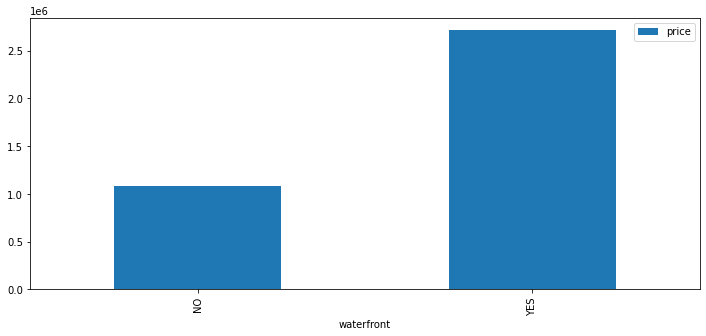

In [36]:
# waterfront vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("waterfront").mean().plot.bar(y="price", ax=ax);

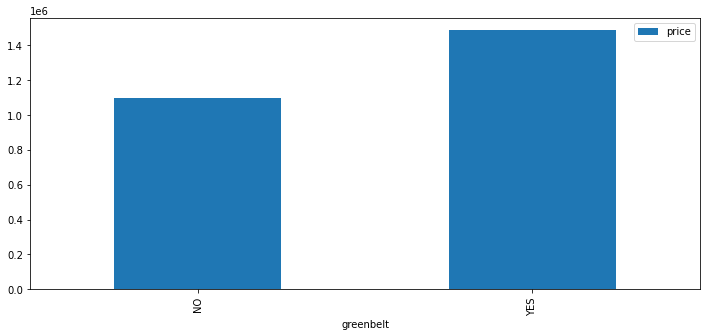

In [37]:
# greenbelt vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("greenbelt").mean().plot.bar(y="price", ax=ax);

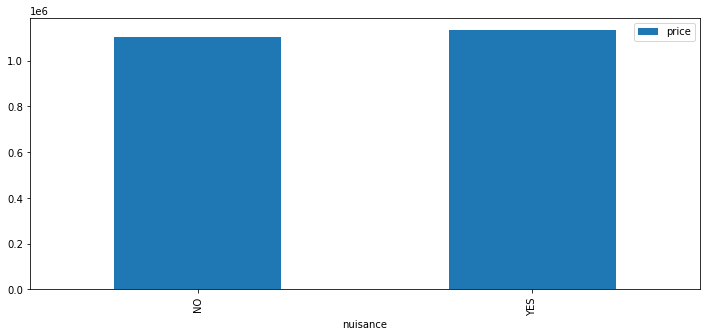

In [38]:
# nuisance vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("nuisance").mean().plot.bar(y="price", ax=ax);

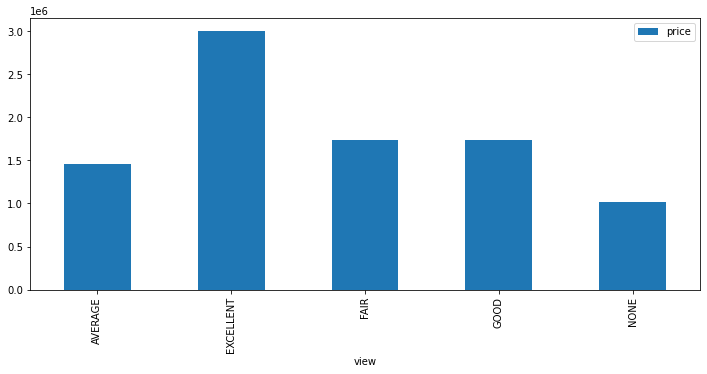

In [39]:
# view vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("view").mean().plot.bar(y="price", ax=ax);

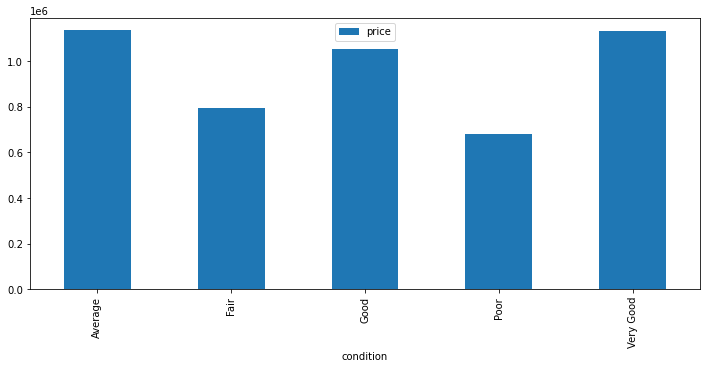

In [40]:
# condition vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("condition").mean().plot.bar(y="price", ax=ax);

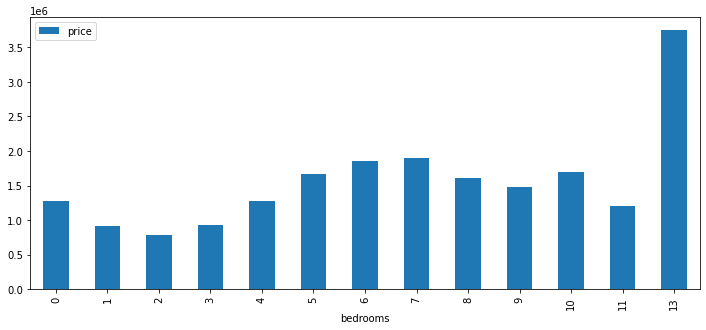

In [41]:
# bedrooms vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("bedrooms").mean().plot.bar(y="price", ax=ax);

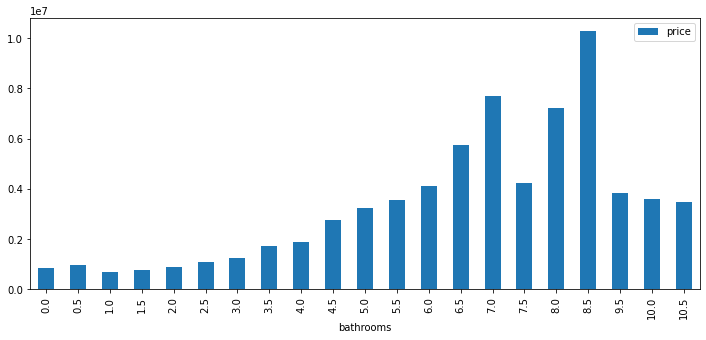

In [42]:
# bathrooms vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("bathrooms").mean().plot.bar(y="price", ax=ax);

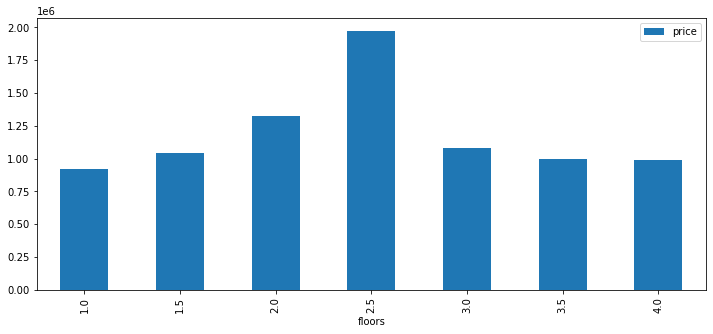

In [43]:
# floors vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("floors").mean().plot.bar(y="price", ax=ax);

Looking at the three binary variables (<b>waterfront</b>, <b>greenbelt</b>, and <b>nuisance</b>), it appears that having a waterfront versus not having one makes a difference in mean price, having a greenbelt versus not having one makes a slight difference in mean price, and nuisance does not make much of a difference in mean price. Specifically, the presence of a waterfront and greenbelt generally increases the price of a home, simply based on the bar graph visualizations of the raw data. 

For <b>view</b>, houses rated 'excellent' had a higher mean price than those rated 'none'. For <b>condition</b>, houses with 'average', 'very good', and 'good' ratings had a greater mean price than those rated 'poor', with 'average' having the highest mean price overall, which was surprising. 

For the <b>bedrooms</b> bar graph, we see a relatively normal distribution; however, there is an outlier of 13 bedrooms that has a really high mean price. The <b>bathrooms</b> bar graph shows a negative skew, while the bar graph for <b>floors</b> is normal.

Let's create a linear regression model incorporating these categorical variables plus rating. However, before the model can be made, the strings in the <b>waterfront</b>, <b>greenbelt</b>, <b>nuisance</b>, <b>view</b>, and <b>condition</b> columns need to be converted into stand-in integers. 

In [44]:
# Adapted from Morgan Jones' code 
# https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb

from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable, while dropping any duplicates
le.fit(cat_data_edited['waterfront'].drop_duplicates()) 
# create new waterfront variable with label encoded values
cat_data_edited['waterfront'] = le.transform(cat_data_edited['waterfront'])

# fit the label encoder to the greenbelt variable, while dropping any duplicates
le.fit(cat_data_edited['greenbelt'].drop_duplicates()) 
# create new greenbelt variable with label encoded values
cat_data_edited['greenbelt'] = le.transform(cat_data_edited['greenbelt'])

# fit the label encoder to the nuisance variable, while dropping any duplicates
le.fit(cat_data_edited['nuisance'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['nuisance'] = le.transform(cat_data_edited['nuisance'])

# fit the label encoder to the view variable, while dropping any duplicates
le.fit(cat_data_edited['view'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['view'] = le.transform(cat_data_edited['view'])

# fit the label encoder to the condition variable, while dropping any duplicates
le.fit(cat_data_edited['condition'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['condition'] = le.transform(cat_data_edited['condition'])

We can see that the data in the waterfront, greenbelt, nuisance, view, and condition columns were successfully transformed. 

In [45]:
cat_data_edited.head()

,waterfront,greenbelt,nuisance,view,condition,grade,bedrooms,bathrooms,floors,price,rating
0,0,0,0,4,2,7 Average,4,1.0,1.0,675000.0,7
1,0,0,1,0,0,7 Average,5,2.5,1.0,920000.0,7
2,0,0,0,0,0,7 Average,6,2.0,1.0,311000.0,7
3,0,0,0,0,0,9 Better,3,3.0,2.0,775000.0,9
4,0,0,1,4,0,7 Average,2,2.0,2.0,592500.0,7


Now that everything has been converted to integer stand-ins, we can use the <b>pd.get_dummies</b> function to create dummy variables. To avoid the dummy variable trap (perfect multicolinearity), we will use <b>.drop()</b> and specify a reference column. Then, we can create our linear regression model.

In [46]:
y_cat = cat_data_edited['price']
X_cat = cat_data_edited[["waterfront", "greenbelt", "nuisance", "view", "condition", "bedrooms", "bathrooms",
                     "floors", "rating"]]

# get dummy variables
X_cat = pd.get_dummies(X_cat, columns=["rating"])
X_cat = X_cat.drop("rating_13", axis=1) # rating_13 is the reference col to drop

# create linear regression model
cat_model = sm.OLS(y, sm.add_constant(X_cat))
cat_results = cat_model.fit()

print(cat_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1436.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:11   Log-Likelihood:            -4.4572e+05
No. Observations:               30111   AIC:                         8.915e+05
Df Residuals:                   30091   BIC:                         8.916e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.221e+06   1.38e+05     45.138      0.0

In [47]:
# calculating overall error of model
mae = cat_results.resid.abs().sum() / len(y_cat)
mae

366096.79447222623

This linear regression model incorporating all the categorical variables of interest shows an R-squared value of 0.475. This is an improvement from the baseline model. However, the R-squared value is still quite low, indicating that this model only predicts about <b>48% of the variation</b> in price. Therefore, further improvements need to be made. In addition, this model incorporates many variables to achieve its higher R-squared value. Let's see what happens when we combine our <b>baseline model</b> (which only had <b>sqft_living</b> as an independent variable) with this model. 

# Numeric and Categorical Variables

We looked at linear regression models with numeric and categorical variables separately. Let's create a model that incorporates both of these types. First, the transformations that were performed on the <b>cat_data_edited</b> dataframe copy need to be performed on the original dataframe, <b>house_data</b>. 

In [48]:
# Adapted from Morgan Jones' code 
# https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb

from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable, while dropping any duplicates
le.fit(house_data['waterfront'].drop_duplicates()) 
# create new waterfront variable with label encoded values
house_data['waterfront'] = le.transform(house_data['waterfront'])

# fit the label encoder to the greenbelt variable, while dropping any duplicates
le.fit(house_data['greenbelt'].drop_duplicates()) 
# create new greenbelt variable with label encoded values
house_data['greenbelt'] = le.transform(house_data['greenbelt'])

# fit the label encoder to the nuisance variable, while dropping any duplicates
le.fit(house_data['nuisance'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['nuisance'] = le.transform(house_data['nuisance'])

# fit the label encoder to the view variable, while dropping any duplicates
le.fit(house_data['view'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['view'] = le.transform(house_data['view'])

# fit the label encoder to the condition variable, while dropping any duplicates
le.fit(house_data['condition'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['condition'] = le.transform(house_data['condition'])

In [49]:
house_data['rating'] = house_data['grade'].str.split().apply(lambda x: x[0])
house_data['rating'] = house_data['rating'].astype('int64')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,rating
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,7
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,7
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,7
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,9
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,7


In [50]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  int32  
 9   greenbelt      30111 non-null  int32  
 10  nuisance       30111 non-null  int32  
 11  view           30111 non-null  int32  
 12  condition      30111 non-null  int32  
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

Now that everything's been transformed successfully, we can create our linear regression model. 

In [51]:
# creating linear regression model with all categorical variables plus highest-correlated numeric variable (sqft_living)
y_combined = house_data['price']
X_combined = house_data[["sqft_living", "rating", "bedrooms", "bathrooms", "floors", "waterfront", "view", "condition",
               "greenbelt", "nuisance"]]
X_combined = pd.get_dummies(X_combined, columns=['rating'])
X_combined = X_combined.drop('rating_13', axis=1) 

combined_model = sm.OLS(y, sm.add_constant(X_combined))
combined_results = combined_model.fit()

print(combined_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     1498.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:11   Log-Likelihood:            -4.4503e+05
No. Observations:               30111   AIC:                         8.901e+05
Df Residuals:                   30090   BIC:                         8.903e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.869e+06   1.39e+05     34.909      

In [52]:
# calculating overall error of model
mae = combined_results.resid.abs().sum() / len(y_combined)
mae

351430.23419330077

This model incorporating the categorical variables of interest plus <b>sqft_living</b> has an R-squared value of 0.499 and has a significant F-statistic. In other words, about <b>50% of the variation</b> in price is accounted for, making this the best model so far at predicting price's variance. All the coefficients for each independent variable are significant at an alpha of 0.05. However, as mentioned earlier with the categorical model, there are many variables. Let's get rid of the variables with high standard error, <b>greenbelt</b> and <b>waterfront</b>.

In [53]:
# revised regression model without greenbelt and waterfront 
y_combined_reduced = house_data['price']
X_combined_reduced = house_data[["sqft_living", "rating", "bedrooms", "bathrooms", "floors", "view", "condition", 
                                 "nuisance"]]
X_combined_reduced = pd.get_dummies(X_combined_reduced, columns=['rating'])
X_combined_reduced = X_combined_reduced.drop('rating_13', axis=1) 

reduced_model = sm.OLS(y, sm.add_constant(X_combined_reduced))
reduced_results = reduced_model.fit()

print(reduced_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1537.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:11   Log-Likelihood:            -4.4562e+05
No. Observations:               30111   AIC:                         8.913e+05
Df Residuals:                   30092   BIC:                         8.914e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.116e+06   1.42e+05     36.020      

In [54]:
# calculating overall model error
mae = reduced_results.resid.abs().sum() / len(y_combined_reduced)
mae

351316.69024114334

The reduced model shows an R-squared value of 0.479, indicating that the model predicts about <b>48% of the variation</b> in price. The overall model error has also decreased slightly. Let's get rid of more variables. We can create a heatmap of the remaining variables to see their relationship with price.

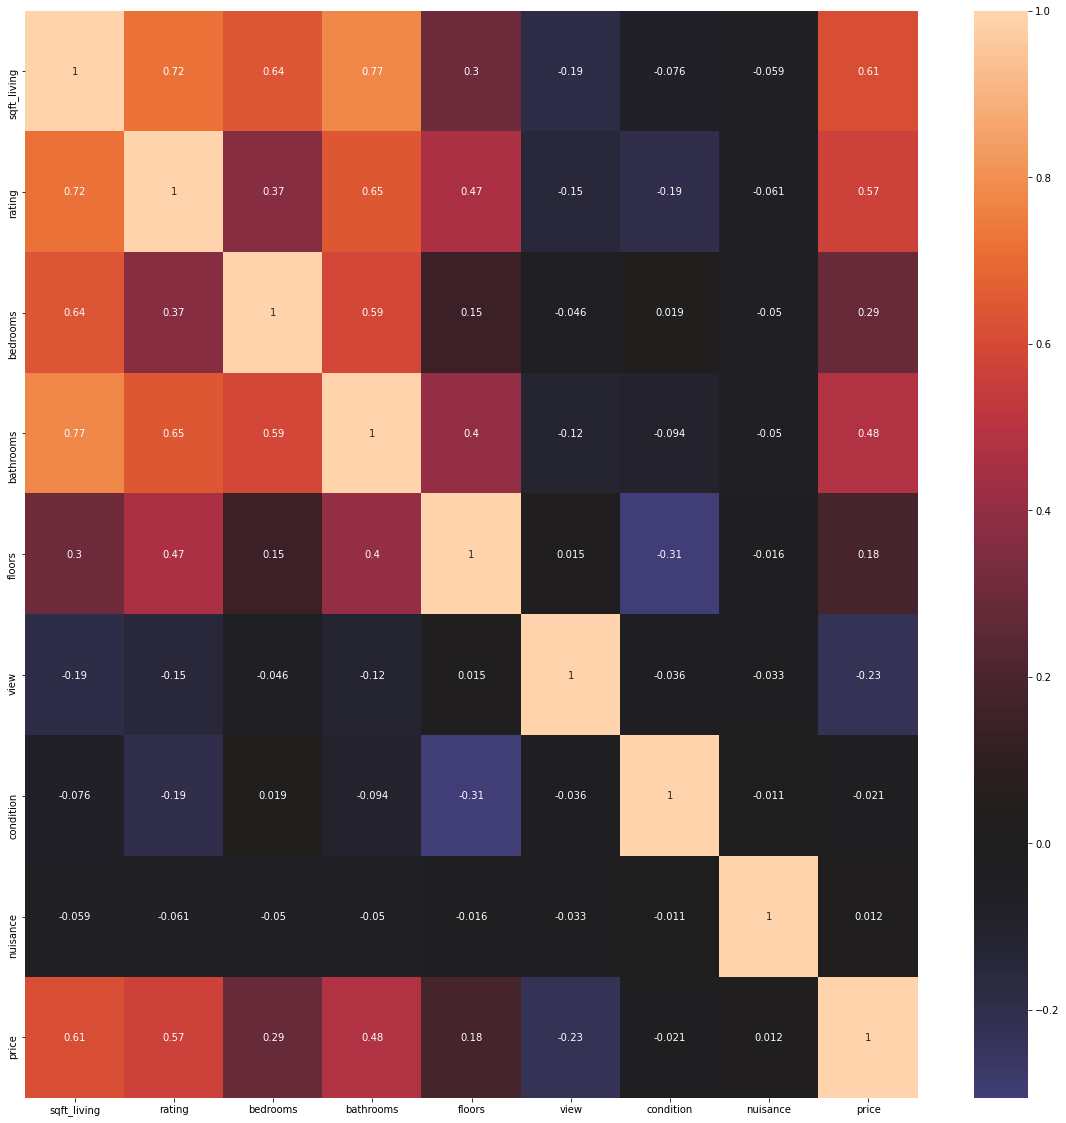

In [55]:
house_data_subset = house_data[["sqft_living", "rating", "bedrooms", "bathrooms", "floors", "view", "condition", "nuisance",
                                "price"]]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(house_data_subset.corr(), center=0, annot=True);

From the heatmap, we see that <b>condition</b> and <b>nuisance</b> have really low correlations with <b>price</b>. Let's get rid of them from our model and see what happens.

In [56]:
# revised regression model without condition and nuisance
y_combined_reduced_ = house_data['price']
X_combined_reduced_ = house_data[["sqft_living", "rating", "bedrooms", "bathrooms", "floors", "view"]]
X_combined_reduced_ = pd.get_dummies(X_combined_reduced_, columns=['rating'])
X_combined_reduced_ = X_combined_reduced_.drop('rating_13', axis=1) 

reduced_model_ = sm.OLS(y, sm.add_constant(X_combined_reduced_))
reduced_results_ = reduced_model_.fit()

print(reduced_results_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1705.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:12   Log-Likelihood:            -4.4572e+05
No. Observations:               30111   AIC:                         8.915e+05
Df Residuals:                   30094   BIC:                         8.916e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.176e+06   1.42e+05     36.336      

In [57]:
# calculating overall model error
mae = reduced_results_.resid.abs().sum() / len(y_combined_reduced_)
mae

353744.6860501169

The R-squared for the model without <b>condition</b> and <b>nuisance</b> has an R-squared value of 0.475, indicating that this model still predicts <b>about 48% of the variation</b> in price. 

# Multiple Linear Regression Assumptions

Before finalizing the model, let's make sure all assumptions of linear regression have been met. They are as follows:

1. <b>Linear relationship</b> between dependent and independent variables

2. <b>No multicollinearity</b>

3. <b>Homoscedasticity</b>

4. Residuals have a <b>normal distribution</b>

If any of these assumptions are violated, edits to the model will be made accordingly.

# Linear Relationship and Multicollinearity

For these two assumptions, a heatmap is worth looking at again.

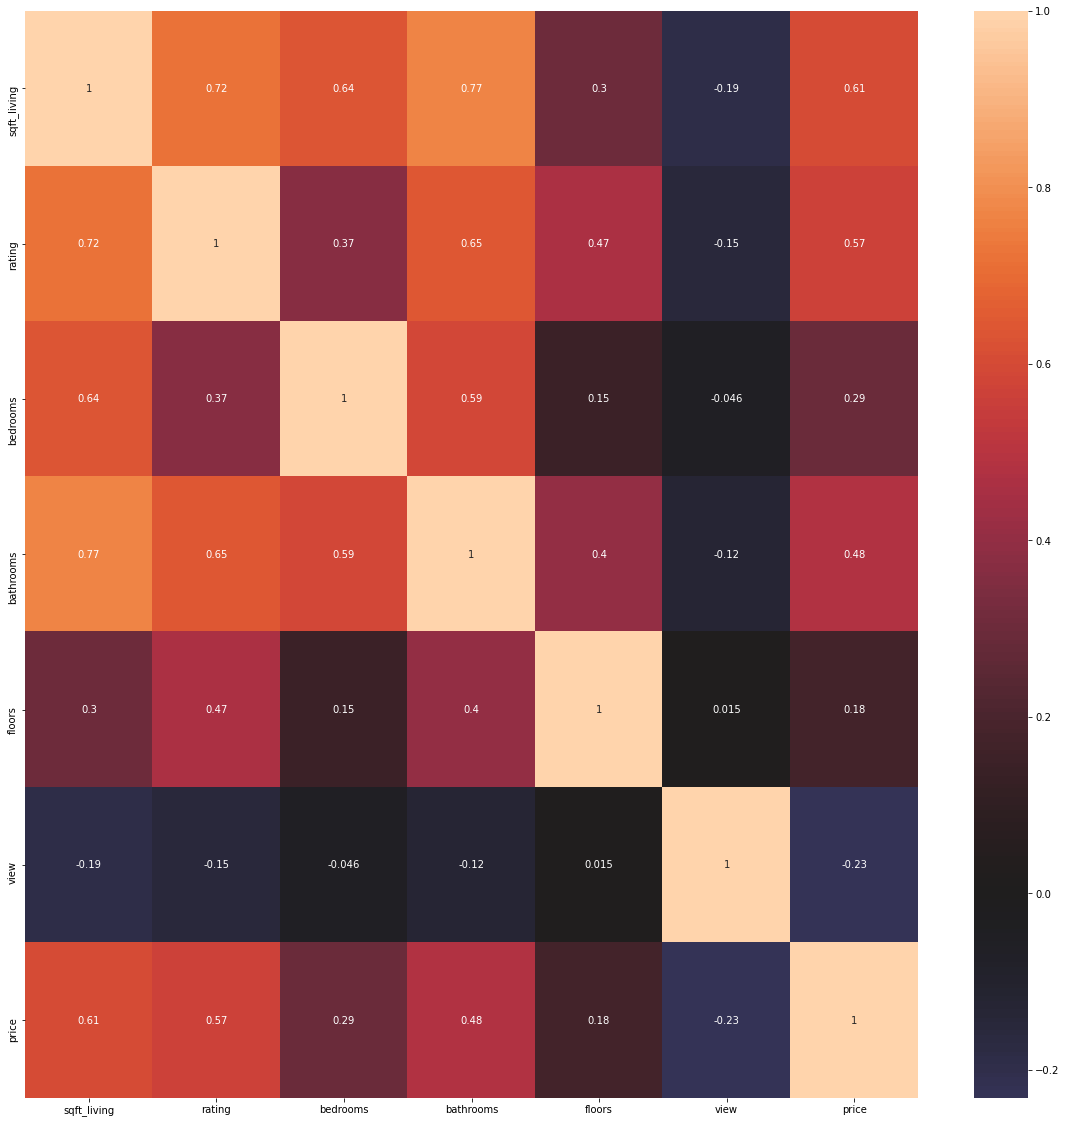

In [58]:
# creating heatmap to visualize correlations between remaining model variables
house_data_subset = house_data[["sqft_living", "rating", "bedrooms", "bathrooms", "floors", "view", "price"]]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(house_data_subset.corr(), center=0, annot=True);

From the heatmap, we see slight multicollinearity with regards to <b>sqft_living</b>, <b>rating</b>, <b>bedrooms</b>, and <b>bathrooms</b>. We can get rid of <b>bedrooms</b> and <b>bathrooms</b> since they have the lowest correlations to <b>price</b>. Because their correlation coefficients are close, to decide between <b>sqft_living</b> and <b>rating</b>, we will create and compare two models where each one is eliminated with <b>bedrooms</b> and <b>bathrooms</b>.

In [59]:
# editing linear regression model
# dropping rating, bedrooms, and bathrooms to reduce multicollinearity
y = house_data['price']
X = house_data[["sqft_living", "floors", "view"]]
X = pd.get_dummies(X, columns=['view'], drop_first=True) # now using drop_first=True to avoid dummy variable trap

model_1 = sm.OLS(y, sm.add_constant(X))
results_1 = model_1.fit()

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     3576.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:13   Log-Likelihood:            -4.4733e+05
No. Observations:               30111   AIC:                         8.947e+05
Df Residuals:                   30104   BIC:                         8.947e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.296e+05   2.03e+04      6.368      

In [60]:
# calculating overall model error
mae = results_1.resid.abs().sum() / len(y)
mae

387842.3611102241

In [61]:
# editing linear regression model
# dropping sqft_living, bedrooms, and bathrooms to reduce multicollinearity
y = house_data['price']
X = house_data[["rating", "floors", "view"]]
X = pd.get_dummies(X, columns=['rating'])
X = X.drop('rating_13', axis=1)

model_2 = sm.OLS(y, sm.add_constant(X))
results_2 = model_2.fit()

print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1717.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:13   Log-Likelihood:            -4.4708e+05
No. Observations:               30111   AIC:                         8.942e+05
Df Residuals:                   30097   BIC:                         8.943e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.797e+06    1.4e+05     55.757      0.0

In [62]:
# calculating overall model error
mae = results_2.resid.abs().sum() / len(y)
mae

380033.7125655809

Between the two models, the linear regression with <b>sqft_living</b>, <b>bedrooms</b>, and <b>bathrooms</b> dropped had the higher R-squared value (0.426 versus 0.416). In addition, it has a smaller condition number and indicates less multicollinearity. However, compared to the reduced model from earlier, the R-squared value of Model 2 is lower (0.475 versus 0.426). Therefore, the best model is still the reduced model. We will proceed with the reduced models and check to see if the normality and homoscedasticity assumptions are met. 

# Normality

One of the assumptions of linear regression is normality of the residuals. Let's create a qq-plot to visualize the normality of the most recent model's residuals.

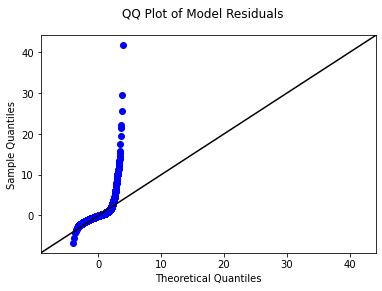

In [63]:
# creating qq-plot of chosen model's residuals
fig, ax = plt.subplots()
sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

line = ax.lines[1]
line.set_color("black")
fig.suptitle("QQ Plot of Model Residuals");

In [64]:
# checking Jarque-Bera number of reduced model
# calculating overall model error
print(reduced_results_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1705.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:13   Log-Likelihood:            -4.4572e+05
No. Observations:               30111   AIC:                         8.915e+05
Df Residuals:                   30094   BIC:                         8.916e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.176e+06   1.42e+05     36.336      

From the QQ plot, we see that normality is violated. This supports the Jarque-Bera statistic in the reduced model results summary, which is high and has a significant p-value, indicating that the null hypothesis (the distribution is normal) is rejected. 

# Homoscedasticity

For the homoscedasticity assumption to be met, the errors of the residuals should be symmetrical.

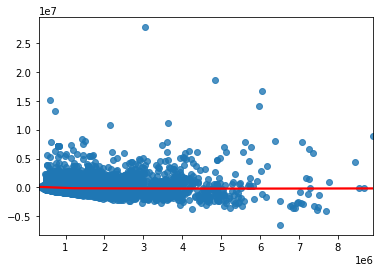

In [65]:
sns.regplot(x=reduced_results_.predict(), y=reduced_results_.resid, lowess=True, line_kws={'color': 'red'});

From the plot, we see that the residuals of the reduced model are not symmetrical. Therefore, this assumption is not met. 

# Mean Absolute Error (MAE)

In [66]:
# revisiting overall model error
mae = reduced_results_.resid.abs().sum() / len(y_combined_reduced_)
mae

353744.6860501169

## Conclusions

Three concrete suggestions based on final model

## Limitations and Future Improvements

In terms of limitations, it should be noted that there were very few variables in the dataset that had a high correlation with sale price. The highest correlation was <b>sqft_living</b>, but even this column's correlation coefficient was only about 0.6. Furthermore, <b>sqft_living</b> correlated with many other variables. The other assumptions of linear